<a href="https://colab.research.google.com/github/carlos-alves-one/-ML-Zoomcamp-Week-3/blob/main/ML_Zoomcamp_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goldsmiths University of London
**Author....: Carlos Manuel de Oliveira Alves**<br>
**Student..: cdeol003**<br>
**Created..: 20/09/2022**

###3.1 Churn prediction project

In [ ]:
# # Import libraries for the project
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
# Locate dataset for the project
data = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/fc43fe928f1b6d0a5143ce89110ddc135b1221e8/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
# Download dataset and store it locally with different file name
!wget $data -O data.csv

--2022-09-25 09:14:49--  https://github.com/alexeygrigorev/mlbookcamp-code/blob/fc43fe928f1b6d0a5143ce89110ddc135b1221e8/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data.csv’

data.csv                [ <=>                ]   2.61M  --.-KB/s    in 0.07s   

2022-09-25 09:14:50 (36.5 MB/s) - ‘data.csv’ saved [2738526]



In [ ]:
# Read the dataset, store it and print the first rows
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Transpose the dataframe for better visualization of the column names
# using the transpose the rows become columns
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


###3.2 Data preparation

In [ ]:
# after we print the data we check for inconsistency e.g. names of the columns
# on this data we have underscores, spaces between the names
# what we need to do is cleaning to make it consistent e.g. make it lower case
# everywhere and replace spaces with underscores

# Make the categorical data of the dataframe consistent 
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = strings = list(df.dtypes[df.dtypes == 'object'].index)

for col in categorical_columns:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
# Check the categorical data of the dataframe is now consistent 
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
# Print the data types of the dataframe
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [ ]:
# Convert a serie of the dataframe to a number
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc
# note: using the parameter errors it will avoid an error called ValueError: Unable to parse string "_"

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [ ]:
# Find the missing values of the total charges serie of the dataframe
tc.isnull().sum()

11

In [ ]:
# Check the missing values of the total charges serie of the dataframe
df[tc.isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-lvygi,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,yes,bank_transfer_(automatic),52.55,_,no
753,3115-czmzd,male,0,no,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.25,_,no
936,5709-lvoeq,female,0,yes,yes,0,yes,no,dsl,yes,...,yes,no,yes,yes,two_year,no,mailed_check,80.85,_,no
1082,4367-nuyao,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.75,_,no
1340,1371-dwpaz,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,credit_card_(automatic),56.05,_,no
3331,7644-omvmy,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.85,_,no
3826,3213-vvolg,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.35,_,no
4380,2520-sgtta,female,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.00,_,no
5218,2923-arzlg,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,mailed_check,19.70,_,no
6670,4075-wkniu,female,0,yes,yes,0,yes,yes,dsl,no,...,yes,yes,yes,no,two_year,no,mailed_check,73.35,_,no


In [ ]:
# Check the missing values of the total charges serie of the dataframe
# select only two columns for better visualization
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [ ]:
# Fill the missing values of the total charges serie with zeros
df.totalcharges.fillna(0)

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [ ]:
# Print the first five churn variable of the dataframe
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [ ]:
# Replace the churn data with numbers
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [ ]:
# Update the churn data with numbers
df.churn = (df.churn == 'yes').astype(int)

###3.3 Setting up the validation framework

In [ ]:
# Import the library sklearn with the project
from sklearn.model_selection import train_test_split

In [ ]:
# to find the documentation for this function use ? 
train_test_split?
# here we are interrested in the test_size parameter and it says how large the dataset should be

In [ ]:
# Define the sizes of the datasets with 20% and use random state so the results are reproducible
# the full train dataset has 80% and the test 20%
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
# Print the sizes of the dataframes full train and test
len(df_full_train), len(df_test)

(5634, 1409)

In [ ]:
# Split the full train dataframe in train and validation dataframes
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
# note: the validation size is 25% because its 20% of the 80% of the full train dataframe

In [ ]:
# Print the sizes of the dataframes train, validation and test
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [ ]:
# Reset the indexes of train, validation and test dataframes
df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

In [ ]:
# Get the churn variables from train, validation and test dataframes
y_train = df_train.churn.values
y_val   = df_val.churn.values
y_test  = df_test.churn.values

In [ ]:
# Delete the serie churn from the dataframes: train, validation and test
del df_train['churn']
del df_val['churn']
del df_test['churn']

# note: we didn't delete the churn variable from the full train dataframe 
# and the reason it will be explained in the next lesson

###3.4 EDA (Exploratory Data Analysis)

In [ ]:
# For EDA we use the full train dataframe 
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.6,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.9,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.5,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.1,1


In [ ]:
# Reset the index of the full train dataframe
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.6,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.9,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.5,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.1,1


In [ ]:
# Looking for the missing values in the full train dataframe
df_full_train.isnull().sum()

# we don't have any missing values

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
# Looking for missing values in the target variable
df_full_train.churn

0       0
1       1
2       0
3       0
4       0
       ..
5629    1
5630    0
5631    1
5632    1
5633    0
Name: churn, Length: 5634, dtype: int64

In [ ]:
# Counts the missing values in the target variable
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [ ]:
# Counts the missing values in the target variable using the percentage
df_full_train.churn.value_counts(normalize=True)

# note: the value 0.269968 its called churn rate

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [ ]:
# Compute the mean of the churn in the full train dataframe
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

0.26996805111821087

In [ ]:
# Round the churn rate variable to two decimal points
round(global_churn_rate, 2)

# 27% the rate of the churn variable

0.27

In [ ]:
# local at the categorical variables and the numerical variables

# Use data types function with full train dataframe to find categorical variables
df_full_train.dtypes

# here we are interested in 3 numerical variables:
# tenure, monthly charges and total charges

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

In [ ]:
# Create a list with numerical variables from the dataframe
numerical = ['tenure','monthlycharges','totalcharges']
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
# Print the column names of the full train dataframe
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
# Create a list with categorical variables from the dataframe
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
    'paymentmethod']
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [ ]:
# Calculate the number unique values for each column in the full train dataframe
df_full_train[categorical].nunique()

# we can see most of the variables are binary e.g. gender has 2 values 
# and other are not e.g. multiplelines has 3 values

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

###3.5 Feature importance: Churn rate and risk ratio

In [ ]:
# Feature importance analysis (part of EDA) - identifying which features affect our target variable
# Churn rate
# Risk ratio
# Mutual information - later

### Churn rate

In [ ]:
# we now are going to look at churn rate within different groups

# Have a look at our full train dataframe

# we can see we have different variables like gender, have partner 
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [ ]:
# Look at the churn rate within each group with gender
# we filter all female customers
df_full_train[df_full_train.gender == 'female']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
5,4765-oxppd,female,0,yes,yes,9,yes,no,dsl,yes,...,yes,yes,no,no,month-to-month,no,mailed_check,65.00,663.05,1
9,1732-vhubq,female,1,yes,yes,47,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,no,bank_transfer_(automatic),70.55,3309.25,1
11,7017-vfuly,female,0,yes,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,bank_transfer_(automatic),20.10,43.15,0
13,1374-dmzui,female,1,no,no,4,yes,yes,fiber_optic,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,94.30,424.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,8065-ykxkd,female,0,no,no,10,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,74.75,799.65,1
5619,5627-tvbpp,female,0,no,yes,35,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,credit_card_(automatic),20.10,644.5,0
5626,3262-eidhv,female,0,yes,yes,72,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,no,credit_card_(automatic),84.70,5893.9,0
5627,7446-sfaoa,female,0,yes,no,37,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,bank_transfer_(automatic),19.85,717.5,0


In [ ]:
# Look at the churn rate within each group with gender and the mean churn
# we filter all female customers
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [ ]:
# Look at the churn rate within each group with gender and the mean churn for male costumers
# we filter all male customers
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [ ]:
# Compute the mean of the churn in the full train dataframe
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

# we can see the rates from female and male are not so different from the global churn

0.26996805111821087

In [ ]:
# Print the sum of the serie partner with the full train dataframe
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [ ]:
# Look at the churn mean now with serie partner using the full train dataframe
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [ ]:
# Look at the churn mean now with serie no partner using the full train dataframe
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [ ]:
# Print the difference from global churn and churn with people with partner
global_churn_rate - churn_partner

0.06493474245795922

In [ ]:
# Print the difference from global churn and churn with people with no partner
global_churn_rate - churn_no_partner

# we conclude: for gender doesn't really matter if a costumer is male or female
# the churn rate is approximately the same but for partner the difference is big
# this gives us some idea that perhaps the partner variable is more important for
# predicting the churn than the gender variable

-0.05984095297455855

In [ ]:
# this gives a way of measuring feature importance
# lets look at differences:

# 1. Difference:
# we look at global churn rate and at the churn rate within group
# if difference is higher than zero it means the global churn rate
# is greater than the group churn raate and it means this group is less
# likely to churn. On the other hand if the difference is negative it means
# that the group churn is higher than the global churn rate and it means
# that for this group they are more like to churn. 

# note: we saw that for gender variable it can be positive and negative
# but the difference it's very tiny so we are more interested in differences
# that are larger 


In [ ]:
# Instead of looking at the difference we can also divide global by group
churn_no_partner / global_churn_rate

# we can see the number below is higher than 1 and it means more people
# are more like to churn 

1.2216593879412643

In [ ]:
# And for people with partner the churn rate is smaller than one
churn_partner / global_churn_rate

0.7594724924338315

In [ ]:
# Another feature importance is
# 2. Risk ratio:
# so the risk in this case we divide the group churn rate by the
# global churn rate and the result is greater than 1 they're more
# like to churn. if it's less than one they're less likely to churn

# conclusion:
# both features importance are very similar, they're kind of telling
# the same information but they tell us it in a different way 

In [ ]:
# Implement the code below in SQL
# SELECT
#     gender,
#     AVG(churn),
#     AVG(churn) / global_churn AS risk
# FROM
#     data
# GROUP BY
#     gender;

In [ ]:
# Translate SQL query to Pandas

# Calculate the mean by gender from the full train dataframe
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [ ]:
# Above it retuns a series but we want to return dataframe 

# Get a dataframe instead of a series we use the agg method
# the agg method is short for aggregate and it takes a list of
# different aggregations that we can perform

# Create a group dataframe grouped by gender and calculate the mean and count
df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])
df_group

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [ ]:
# Calculate the diff and the risk with group dataframe
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [ ]:
# for each column in this list we want to do this aggregation

# Import the library IPython to display dataframe
from IPython.display import display

# Create a for loop to generate an aggregation from the categorical list
for c in categorical:

  # Print the name of the categorical variable
  print(c)

  # Create a group dataframe grouped by categorcial and calculate the mean and count
  df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])


  # Calculate the diff and the risk with group dataframe
  df_group['diff'] = df_group['mean'] - global_churn_rate
  df_group['risk'] = df_group['mean'] / global_churn_rate

  # df_group # when execute because this line of code is in the loop
  # we don't see it or doesn't display
  # we neeed to use a special function for displaying 
  # we import the library IPython
  # we change from: df_group to:
  # Use the method display to display the group dataframe
  display(df_group)

  # Add a few line breaks when print data
  print()
  print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




partner


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




dependents


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




phoneservice


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




multiplelines


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




internetservice


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




onlinesecurity


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




onlinebackup


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




deviceprotection


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




techsupport


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




streamingtv


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




streamingmovies


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




contract


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




paperlessbilling


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




paymentmethod


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


###3.6 Feature importance: Mutual information

In [ ]:
# Mutual information - concept from information theory, it tells us how much we can learn 
# about one variable of we know the value of another

# using scikit-learn we don't need to write the formula
# Use scikit-learn to implements mutual information
from sklearn.metrics import mutual_info_score

In [ ]:
# Use mutual info score method with full train dataframe using the contract and churn variables
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [ ]:
# Compare gender with the churn using the full train dataframe
mutual_info_score(df_full_train.gender, df_full_train.churn)

# we can see the value is not informative

0.0001174846211139946

In [ ]:
# Aplly the metric to all critical variables we have
# and see which of them has the highest mutual information
# and which of them has the lowest feature information

In [ ]:
# Create a function returns the mutual churn score
def mutual_info_churn_score(series):
  return mutual_info_score(series, df_full_train.churn)

In [ ]:
# Use the function apply with mutual info churn score and with categorical variables
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [ ]:
# Use sort values function with the result of the mutual information
mi.sort_values()

gender              0.000117
phoneservice        0.000229
multiplelines       0.000857
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
paperlessbilling    0.017589
streamingmovies     0.031581
streamingtv         0.031853
paymentmethod       0.043210
deviceprotection    0.043453
onlinebackup        0.046923
internetservice     0.055868
techsupport         0.061032
onlinesecurity      0.063085
contract            0.098320
dtype: float64

In [ ]:
# Use sort values function with the result of the mutual information in descending order
mi.sort_values(ascending=False)

# conclusion:
# this is kind of signals that machine learning models pick when training and so it learns
# this kind of patterns and this is what allows the model to actually make predictions later
# when we don't know what the churn value is for this particular customers

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

###3.7 Feature importance: Correlation

In [ ]:
# Correlation is a way to measure future importance for numerical variables
# correlation is also known as Person's correlation (look on the web for correlation coefficient)
# and its a way to measure dependency between two variables

# if we have a variable x and a variable y and both this variables are numbers
# the correlation coefficient usually is denoted by a letter r is a number
# between -1 and 1, so for negative correlation when values of x grow the values of y 
# they go down and in this case we say the correlation is negative increasing increasing one
# variable leads to decrease in another variable

# when correlation is positive one variable grows and the other grows as well so in this
# case an increase in one variable leads to an increase in another variable
# it can take any value between -1 and 1
# so when a correlation coefficient is somewhere between 0 and 0.2 or 
# lilewise for negative correlation between 0 and -0.2 so the correlation
# is always almost non-existent and we call low, low rarely and it means that for positve correlation
# when one variable increases only very rarely it leads to an increase in the other variable

# for values between 0.2 and 0.5 and if we talk about negative correlation numbers between -0.2 and 0.5
# so here it's moderate sometimes correlation so values increases in one variable sometimes lead to increasing 
# other variable and then values between -0.6 and -1.0 and 0.6 and 1.0 so this is very strong correlation 
# or strong often correlation or when it's close to one when its higher than 0.9 then its almost always
# correlation 

# x is tenure which is the number of months clients spent with us and it takes values between 0 and 72
# y is churn and only can take values betweem 0 or 1
# this case positive correlation between x and y means that when x increases more tenure and more churn
# it means for the larger the value of x are the higher the churn rate 
# and likewise negative correlation means more tenure less churn 
# for zero correlation means that variable doesn't really affect churn rate at all

In [ ]:
# Check the maximum value of tenure with full train dataframe
df_full_train.tenure.max()

72

In [ ]:
# Check the correlation between our numerical variables and churn

# Select the numerical values of the full train dataframe
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.6
5630,60,19.95,1189.9
5631,28,105.70,2979.5
5632,2,54.40,114.1


In [ ]:
# Select the numerical values of the full train dataframe
# we have this correlationn coefficient we want to correlate it with churn

# Use the corrwith function to do the correlation coefficient with churn
df_full_train[numerical].corrwith(df_full_train.churn)

# from the result below we can conclude the tenure is negative and we can interpret negative
# coefficient here is that when tenure increases so the longer customer stays with us the less
# likely to churn, so with the increase of tenure then churn rate goes down

# with the monthly charges the way we can interpret it the higher the monthly charges are
# the most likely customers are to leave so the increase in monthly charges will lead to 
# increase in the churn rate

tenure           -0.351885
monthlycharges    0.196805
dtype: float64

In [ ]:
# Look at the tenure for customers are with the company only for 2 months or less
df_full_train[df_full_train.tenure <= 2].churn.mean()

# the rate 59% its pretty high and it means if a customer stays with company, zero, one or two
# months the churn rate in this group is pretty high 

0.5953420669577875

In [ ]:
# Look at the tenure for customers are with the company more than 2 months
df_full_train[df_full_train.tenure > 2].churn.mean()

# the rate 22% its pretty low 

0.22478269658378816

In [ ]:
# Look at the tenure for customers are with the company less than a year
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

# the rate 39% its pretty higher almost 40% 

0.3994413407821229

In [ ]:
# Look at the tenure for customers are with the company more than one year
df_full_train[df_full_train.tenure > 12].churn.mean()

# the rate 17% its pretty low so for them churn rate is even lower it's only 17%

# we can conclude this trend that it really goes down (from 60%, 40% and then 17%)
# and with continues increases with the months the churn rate really goes down
# we call this trend negative correlation

0.17634908339788277

In [ ]:
# lets look at the monthly charges:

# Look at the monthly charges for customers pay £20 or less
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

# the churn rate is slightly less than 9% 

0.08795411089866156

In [ ]:
# Look at the monthly charges for customers pay between £20 and £50
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

# the churn rate is 18%

0.18340943683409436

In [ ]:
# Look at the monthly charges for customers pay more than £50
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

# the churn rate is 32%

# we can conclude this trend that it really goes up (from 8%, 18% and then 30%)
# and with continues increases with the monthly charges the churn rate really goes up
# we call this trend positive correlation

0.32499341585462205

In [ ]:
# if we don't want to look at the importance of direction we can look at the absolute value

# Use the corrwith function with churn and returns the absolute value
df_full_train[numerical].corrwith(df_full_train.churn).abs()

# the values below are already sorted and we can conclude the tenure is the most important
# numerical variable and the monthly charges is the less important numerical variable
# with this we can understand how numerical variables affect our target variable the churn

tenure            0.351885
monthlycharges    0.196805
dtype: float64

###3.8 One-hot encoding

In [ ]:
# next we will see how we can encode categorical features before we can put them
# in the model and instead of implementing this manually this time we use sckit-learning

# Use Sckit-Learn to encode categorical features

# Implemeting one hot encoding using dictionaries vectorizer
from sklearn.feature_extraction import DictVectorizer

In [ ]:
# Use the train dataframe and look at the variables gender and contract
# use iloc we take a look at the first 100 rows of the dataframe
df_train[['gender', 'contract']].iloc[:100]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


In [ ]:
# Turn the data into a dictionary and we want each row to turn into a dictionary
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dicts

# if we don't say records it will turn each column into a dictionary

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [ ]:
# Create a new instance of the DictVectorizer class
dv = DictVectorizer()

# Use the method fit and first we train our DictVectorizer
dv.fit(dicts)

DictVectorizer()

In [ ]:
# now learns what kind of data is there but first let's transform 
# and then we'll look at 

# Use the function transform with our DictVectorizer
dv.transform(dicts)

# below it actually produces a sparse matrix and its a special way of enconding
# data when there are many zeros because we have a lot of categorical variables
# most of them will be zeros 

<100x5 sparse matrix of type '<class 'numpy.float64'>'
	with 200 stored elements in Compressed Sparse Row format>

In [ ]:
# We are not using the sparse matrices here

# Create a new instance of the DictVectorizer class without sparse
dv = DictVectorizer(sparse=False)

# Use the method fit and first we train our DictVectorizer
dv.fit(dicts)

DictVectorizer(sparse=False)

In [ ]:
# Use the function transform with our DictVectorizer
dv.transform(dicts)

# below we see it creates 5 columns
# the first 3 for contract and the last 2 for gender

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [ ]:
# Print the features names of the DictVectorizer
dv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [ ]:
# Conclusion:
# this how we can use the DictVectorizer
# first we turn our dataframe into a bunch of dictionaries
# and then we fit our DictVectorizer by showing all the dictionaries
# and then it infers what are the column names, what are the values,
# what are the variable names, what are the values there and based on that
# it creates this one hot encoding feature matrix

# Note: DictVectorizer is quite smart if we add e.g. tenure (its a numerical variable)
# it generate the one hot encoding feature matrix and for numerical variables it leaves it intact
# so it doesn't perform any transformation just store the value

In [ ]:
# Create train dictionaries coming from the train dataframe using all categorical and numerical variables
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [ ]:
# Print the first record of the train dicts
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': '8425.15'}

In [ ]:
# Fit our DictVectorizer

# Create train dictionaries coming from the train dataframe using all categorical and numerical variables
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [ ]:
# Create a new instance of the DictVectorizer class without sparse
dv = DictVectorizer(sparse=False)

# Use the method fit and first we train our DictVectorizer
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [ ]:
# Print the features names of the DictVectorizer
dv.get_feature_names()

# now our feature names it becomes a quite large list
# so each variable e.g. contract has a group of month-timonth, one_year and two year
# note: the monthlycharges its a numerical variable
# so for each categorical variable there is a group of binary variables

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [ ]:
# now lets see what happens when we transform the first 5 records
# Use the function transform with our DictVectorizer
dv.transform(train_dicts[:5])

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
# Use the function transform with our DictVectorizer convert to a list

list(dv.transform(train_dicts[:5]))

[array([0., 0., 1., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 1., ..., 0., 0., 0.])]

In [ ]:
# Change from this:
# Create a new instance of the DictVectorizer class without sparse
# dv = DictVectorizer(sparse=False)

# Use the method fit and first we train our DictVectorizer
# dv.fit(train_dicts)

# to this:
# Create an instance of the DictVectorizer class without sparse and then fit it immediately
dv = DictVectorizer(sparse=False).fit(train_dicts)

In [ ]:
# This expression is identical as above
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [ ]:
# We see it by using the shape function
X_train.shape

(4225, 4056)

In [ ]:
# Use the fit transform function we have the same shape
X_train = dv.fit_transform(train_dicts)

# This expression is identical as above
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [ ]:
# Using the shape function we have the same values
X_train.shape

(4225, 4056)

In [ ]:
# we can do the same thing for our validation dataframe
# Create validation dictionaries coming from the validation dataframe using all categorical and numerical variables
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [ ]:
# Now instead of fit transform we use only transform function
# to get the feature matrix for the validation dataframe
X_val = dv.transform(val_dicts)

In [ ]:
# now we have the feature matrices for training and validation 
# and we are ready to train our model 

###3.9 Logistic regression

In [ ]:
# note we will train the model only in the next lesson

# Create sigmoid function
def sigmoid(z): # z is the output

  # Declare the sigmoid formula and return the result
  return 1 / (1 + np.exp(-z))

In [ ]:
# Create a list of numbers from -5 to 5 with 51 numbers
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [ ]:
# Apply the sigmoid function with the list z
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

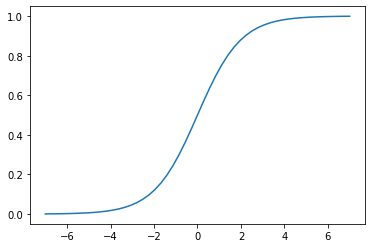

In [ ]:
# Plot the list z and sigmoid
plt.plot(z, sigmoid(z))

In [ ]:
# we use sigmoid function to convert the score in probability
# note: sigmoid is probability

# Declare the bias term variable
w0 = 0

# Declare a vector for each feature
w = [1, 1, 1]

# Define a linear regression function
def linear_regression(xi):
  
  result = w0 # the w this is the bias

  for j in range (len(w)):
    result = result + xi[j] * w[j] # the w is the weights vector

  return result

In [ ]:
# Define a logistic regression function
def logistic_regression(xi):
  
  score = w0 # the w this is the bias

  for j in range (len(w)):
    score = score + xi[j] * w[j] # the w is the weights vector

  result = sigmoid(score)

  return result

###3.10 Training logistic regression with Scikit-Learn

In [ ]:
# previous lesson we compared linear regression with logistic regression
# and difference between them so they are quite similar 
# the difference between them at the end for logistic regression we convert the score
# that we get into a number between 0 and 1 but otherwise they are pretty similar so
# they have logistic relation also has bias w0 and the weights vector w[j] so in this
# lesson we will see how to actually get these parameters how to learn these parameters
# and for that we use Scikit-Learn

In [ ]:
# Use linear models package from Scikit-Learn
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create a model logistic regression
model = LogisticRegression()

# For training the model we use the fit method
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Look what is inside of the model using the method coef
model.coef_

# this are the weights the w 
# we have a two dimensional array with just one row

array([[ 0.90448488,  0.23114616, -1.30933796, ...,  0.03605706,
        -0.0545611 , -0.08516941]])

In [ ]:
# Use the intercept method to get the biases
# this the first element of this array
model.intercept_[0]

# this number below are the coefficients

-0.1900908219977011

In [ ]:
# Get the w from the model and rounded to 3 decimal places
model.coef_[0].round(3)

array([ 0.904,  0.231, -1.309, ...,  0.036, -0.055, -0.085])

In [ ]:
# Use the model with function predict on our train dataframe
model.predict(X_train)

# we see that it predicts already numbers so it predicts zero and one so in
# this case zero is not churn and one is churn 
# what we are interested in are not predictions and this are called hard predictions
# because they already have the exact label

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
# Use the function predict proba to learn the probablity 
model.predict_proba(X_train)

# this are soft predictions by soft we mean it's not just a number zero or one
# but a score

# below we have two columns and its a two dimensional matrix
# the first column (left side of the array) is the probability of being negative 
# and the second column (right side of the array) is the probability to be positve
# we are only interested only on the probability to be positve or the probability of churning

array([[0.97088241, 0.02911759],
       [0.33643604, 0.66356396],
       [0.38896985, 0.61103015],
       ...,
       [0.45679117, 0.54320883],
       [0.97519084, 0.02480916],
       [0.29459932, 0.70540068]])

In [ ]:
# Select only the column with the probability to be positve
# this would be soft predictions
y_pred = model.predict_proba(X_train)[:,1]
y_pred

array([0.02911759, 0.66356396, 0.61103015, ..., 0.54320883, 0.02480916,
       0.70540068])

In [ ]:
# Do the same but now with the validation dataframe
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00655274, 0.23465041, 0.22099833, ..., 0.14213267, 0.80692722,
       0.81456804])

In [ ]:
# Select customers the threshold 0.5 and above
churn_decision = y_pred >= 0.5
churn_decision

# we get a binary array with predictions 
# false means customer not churning and true means customer is churning

array([False, False, False, ..., False,  True,  True])

In [ ]:
# Select all the customers that we think are going to churn
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.2
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
24,2612-ranwt,female,0,no,no,12,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,bank_transfer_(automatic),100.15,1164.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.2
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.7
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.3


In [ ]:
# Select all the customers that will receive a promotional email with some discount
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 312, dtype: object

In [ ]:
# let see how accurate our predictions are 
# for regression we use RMSE as a way to measure the performance of our model
# to see how good it is here we are going to use something similar called accuracy
# which tell us how many correct predictions we made

# first we have our y validation
# Print the array y validation
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
# Print the array with our churn decisions
churn_decision.astype(int)

# we can see how nany of them match so we can see 
# comparing the y_val and churn_decisions we can see the last two elements 1 and 1 they match
# and we can the first 3 elements they match as well

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
# To compare we can use the equals operator
# its better to use this method so we get the final results
# it returns true if the numbers match and false if they don't
y_val == churn_decision

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
# Use the method mean to get the percentage of our predictions match
# in this case is 80%
(y_val == churn_decision).mean()

0.8041163946061036

In [ ]:
# Create a dataframe predictions
df_pred = pd.DataFrame()

# Store the probability that this particular customer is going to churn
df_pred['probability'] = y_pred 

# Store the prediction that this particular customer is going to churn
df_pred['prediction'] = churn_decision.astype(int)

# Store the value of y validation
df_pred['actual'] = y_val

In [ ]:
# Print the dataframe predictions
df_pred

# the values below that are correct are the ones the prediction and actual match the number

,probability,prediction,actual
0,0.006553,0,0
1,0.234650,0,0
2,0.220998,0,0
3,0.585280,1,1
4,0.218054,0,0
...,...,...,...
1404,0.402560,0,0
1405,0.070621,0,1
1406,0.142133,0,0
1407,0.806927,1,1


In [ ]:
# Print the predictions values are correct
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

# looking at our dataframe we have another column it says correct for each times it matches
# each time is the same its true and when its not correct its false 

,probability,prediction,actual,correct
0,0.006553,0,0,True
1,0.234650,0,0,True
2,0.220998,0,0,True
3,0.585280,1,1,True
4,0.218054,0,0,True
...,...,...,...,...
1404,0.402560,0,0,True
1405,0.070621,0,1,False
1406,0.142133,0,0,True
1407,0.806927,1,1,True


In [133]:
# Find the fraction of correct ones with predict dataframe
df_pred.correct.mean()

0.8041163946061036